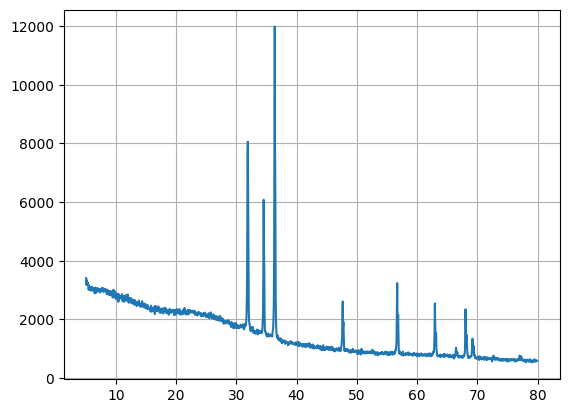

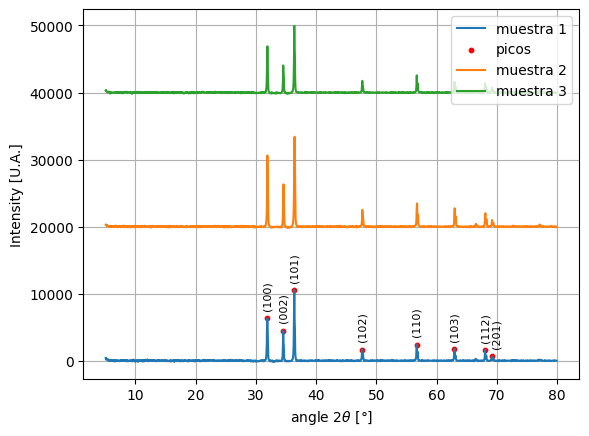

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks


df_1 = pd.read_csv("7059.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])
df_2 = pd.read_csv("7060.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])
df_3 = pd.read_csv("7061.csv", skiprows=29, header=None, sep=',' , names=['Angle', 'Intensity'])


angle = df_1.iloc[:-1,0].values
I_1 = df_1.iloc[:-1,1].values
I_2 = df_2.iloc[:-1,1].values
I_3 = df_3.iloc[:-1,1].values


# for i , dif in enumerate(np.diff(I_1)):
#     if dif < 300:
#         I_1[i] = I_1[i] -  (I_1[i] + I_1[i+1])/2
        
    


plt.plot(angle, I_1)
plt.grid()
plt.show()


planos = ["(100)", "(002)", "(101)", "(102)", "(110)", "(103)", "(112)", "(201)" ]

window = 100  # probar 101..2000 según densidad de datos
baseline = pd.Series(I_1).rolling(window, center=True, min_periods=1).median().values
I_corr1 = I_1 - baseline


peaks1, _ = find_peaks(I_corr1, height=500, distance=20)

fig, ax = plt.subplots()
ax.plot(angle, I_corr1, label = 'muestra 1')
#ax.margins(y=0.17)  
for j, i in enumerate(peaks1[:-1]):
    ax.text(angle[i], I_corr1[i]+1500, planos[j], ha='center', rotation=90, fontsize=8)
ax.text(angle[peaks1[-1]+15], I_corr1[peaks1[-1]]+1500, planos[-1], ha='center', rotation=90, fontsize=8)
ax.scatter(angle[peaks1], I_corr1[peaks1], s = 10, label = 'picos', color = 'red')

#plt.plot(angle, I_1, label='original')
#plt.plot(angle, baseline, label='baseline (rolling median)', linewidth=2)
#plt.plot(angle, I_corr1, label='corrected 1')
#plt.show()

baseline2 = pd.Series(I_2).rolling(window, center=True, min_periods=1).median().values
I_corr2 = I_2 - baseline2
peaks2, _ = find_peaks(I_corr2, height=500, distance=20)
#plt.plot(angle, I_2, label='original')
#plt.plot(angle, baseline2, label='baseline (rolling median)', linewidth=2)
ax.plot(angle, I_corr2+20000, label='muestra 2')

baseline3 = pd.Series(I_3).rolling(window, center=True, min_periods=1).median().values
I_corr3 = I_3 - baseline3
peaks3, _ = find_peaks(I_corr3, height=500, distance=20)
#plt.plot(angle, I_3, label='original')
#plt.plot(angle, baseline3, label='baseline (rolling median)', linewidth=2)
ax.plot(angle, I_corr3+40000, label='muestra 3')
ax.set_xlabel(r"angle $2\theta$ [°]")
ax.set_ylabel("Intensity [U.A.]")
plt.legend(); plt.grid(); plt.show()


### Cálculos

#### Distancias interplanares

In [67]:
import numpy as np

lo = 1.541874  # Å
peaks = [peaks1, peaks2, peaks3]

for j, peaks_j in enumerate(peaks, start=1):
    print(f"--- Muestra {j} ---")
    for i in range(len(planos)):
        idx = peaks_j[i]
        two_theta_deg = angle[idx]  #ángulo en grados       
        theta_rad = np.deg2rad(two_theta_deg/2) #ángulo en radianes  
        d_spacing = lo / (2 * np.sin(theta_rad)) # ecuación de Bragg
        print(f"{planos[i]:6s}  2θ={two_theta_deg:.4f}°  ->  d = {d_spacing:.6f} Å")
        


--- Muestra 1 ---
(100)   2θ=31.9171°  ->  d = 2.804002 Å
(002)   2θ=34.5431°  ->  d = 2.596613 Å
(101)   2θ=36.3814°  ->  d = 2.469523 Å
(102)   2θ=47.6734°  ->  d = 1.907639 Å
(110)   2θ=56.7070°  ->  d = 1.623331 Å
(103)   2θ=62.9571°  ->  d = 1.476384 Å
(112)   2θ=68.0516°  ->  d = 1.377740 Å
(201)   2θ=69.2071°  ->  d = 1.357535 Å
--- Muestra 2 ---
(100)   2θ=31.9171°  ->  d = 2.804002 Å
(002)   2θ=34.5957°  ->  d = 2.592791 Å
(101)   2θ=36.4339°  ->  d = 2.466084 Å
(102)   2θ=47.6734°  ->  d = 1.907639 Å
(110)   2θ=56.7596°  ->  d = 1.621954 Å
(103)   2θ=63.0096°  ->  d = 1.475280 Å
(112)   2θ=68.1041°  ->  d = 1.376806 Å
(201)   2θ=69.2071°  ->  d = 1.357535 Å
--- Muestra 3 ---
(100)   2θ=31.9171°  ->  d = 2.804002 Å
(002)   2θ=34.5431°  ->  d = 2.596613 Å
(101)   2θ=36.3814°  ->  d = 2.469523 Å
(102)   2θ=47.6734°  ->  d = 1.907639 Å
(110)   2θ=56.7070°  ->  d = 1.623331 Å
(103)   2θ=62.9571°  ->  d = 1.476384 Å
(112)   2θ=68.0516°  ->  d = 1.377740 Å
(201)   2θ=69.2071°  ->  d

#### Parámetros de red

In [74]:
for j, peaks_j in enumerate(peaks, start=1):
    print(f"--- Muestra {j} ---")
    idx = peaks_j[0]
    two_theta_deg = angle[idx]
    theta_rad = np.deg2rad(two_theta_deg/2)
    a = lo / (np.sqrt(3)*np.sin(theta_rad))
    idx = peaks_j[1]
    two_theta_deg = angle[idx]
    theta_rad = np.deg2rad(two_theta_deg/2)
    c = lo / (np.sin(theta_rad))
    
    print(f"Los parámestros de red son a = {a:.4} Å, c = {c:.4} Å")
    print( )

--- Muestra 1 ---
Los parámestros de red son a = 3.238 Å, c = 5.193 Å

--- Muestra 2 ---
Los parámestros de red son a = 3.238 Å, c = 5.186 Å

--- Muestra 3 ---
Los parámestros de red son a = 3.238 Å, c = 5.193 Å



#### Tamaño de grano, ecuación de Scherrer.

En alguna literatura aparece que el factor de forma es 0.9 para el óxido de zinc, usemos ese

Pico 0: 2θ = 31.9171°, FWHM = 0.1710°
Pico 1: 2θ = 34.5431°, FWHM = 0.1478°
Pico 2: 2θ = 36.3814°, FWHM = 0.1557°
Pico 3: 2θ = 47.6734°, FWHM = 0.1369°
Pico 4: 2θ = 56.7070°, FWHM = 0.1265°
Pico 5: 2θ = 62.9571°, FWHM = 0.1240°
Pico 6: 2θ = 68.0516°, FWHM = 0.1056°
Pico 7: 2θ = 69.2071°, FWHM = 0.1339°
[3.25624389 2.81414953 2.96394949 2.60719673 2.4086254  2.36175244
 2.00990469 2.55015791]


In [100]:
import numpy as np
from scipy.signal import peak_widths
intensidades = [I_corr1, I_corr2, I_corr3]
peaks = [peaks1, peaks2, peaks3]
fwhm_deg = []


# I_corr1: señal corregida
# peaks1: índices de picos (output de find_peaks)
for i, j in enumerate(intensidades):
    widths, h_eval, left_ips, right_ips = peak_widths(j, peaks[i], rel_height=0.5)
    fwhm_deg.append(widths*(angle[1]-angle[0]))   # FWHM en grados (2θ)




lo = 1.541874  # Å
for j, peaks_j in enumerate(peaks, start=1):
    print(f"--- Muestra {j} ---")
    for i in range(len(planos)):
        idx = peaks_j[i]
        two_theta_deg = angle[idx]
        FWHM = np.deg2rad(fwhm_deg[j-1][i])  #ángulo en grados       
        theta_rad = np.deg2rad(two_theta_deg/2) #ángulo en radianes  
        D_grain = (0.9*lo) / (FWHM * np.cos(theta_rad)) # ecuación de Bragg
        print(f"{planos[i]:6s}  2θ={two_theta_deg:.4f}°  ->  d = {D_grain:.6f} Å")

--- Muestra 1 ---
(100)   2θ=31.9171°  ->  d = 483.538910 Å
(002)   2θ=34.5431°  ->  d = 563.340746 Å
(101)   2θ=36.3814°  ->  d = 537.619673 Å
(102)   2θ=47.6734°  ->  d = 634.785582 Å
(110)   2θ=56.7070°  ->  d = 714.185829 Å
(103)   2θ=62.9571°  ->  d = 751.588534 Å
(112)   2θ=68.0516°  ->  d = 908.787427 Å
(201)   2θ=69.2071°  ->  d = 721.206489 Å
--- Muestra 2 ---
(100)   2θ=31.9171°  ->  d = 554.886691 Å
(002)   2θ=34.5957°  ->  d = 542.080614 Å
(101)   2θ=36.4339°  ->  d = 468.719213 Å
(102)   2θ=47.6734°  ->  d = 423.286232 Å
(110)   2θ=56.7596°  ->  d = 692.301180 Å
(103)   2θ=63.0096°  ->  d = 798.417724 Å
(112)   2θ=68.1041°  ->  d = 738.362336 Å
(201)   2θ=69.2071°  ->  d = 746.221480 Å
--- Muestra 3 ---
(100)   2θ=31.9171°  ->  d = 550.880178 Å
(002)   2θ=34.5431°  ->  d = 525.375886 Å
(101)   2θ=36.3814°  ->  d = 519.872321 Å
(102)   2θ=47.6734°  ->  d = 470.097835 Å
(110)   2θ=56.7070°  ->  d = 794.593138 Å
(103)   2θ=62.9571°  ->  d = 685.220930 Å
(112)   2θ=68.0516°  -

In [101]:
fwhm_deg[0]

array([0.1710216 , 0.14780231, 0.15566997, 0.13693291, 0.12650372,
       0.1240419 , 0.10556246, 0.13393717])